# Лабораторная работа №1. Методы оптимизации
### Королев Сергей. Группа РК6-61Б

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import math as math

подключим файл с значениями и выполним сортировку:

In [8]:
data = pd.read_csv('lab1.csv',sep=' ', names=['x', 'y'])
data = data.sort_values('x')
data.head()

x          y
4  -9.282208 -32.656908
15 -9.266714 -33.721800
33 -8.653507 -64.852111
16 -7.666125 -68.625440
23 -6.424390 -23.218759

Для начала выведем точки на график и построим кусочно-линейный полином по данным точкам:

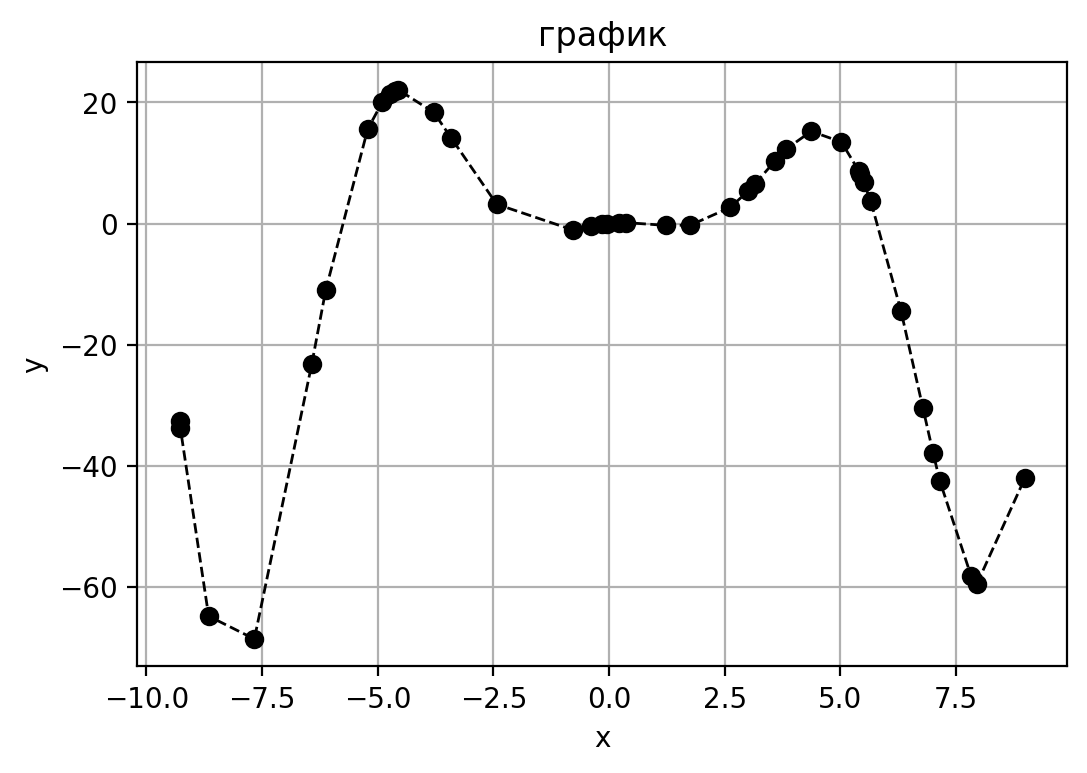

In [4]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=200)
axes.plot(data.x, data.y, '-o', color="black", linewidth=1.0, linestyle="--", label="Численная")
axes.set_title("график")
axes.grid()
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show()

По МНК сделаем предположение что функция f(x)=(x^3+x)*sin(x)+x

После этого параметризируем эту функцию и проведем оптимизацию этих параметров:

In [5]:
def f(x, a, b, c,d):
    return (a*x**3+b*x)*np.sin(c*x)+(d*x)

res = curve_fit(f, data.x, data.y)[0]
a = res[0]
b = res[1]
c = res[2]
d = res[3]

print('Значения коэффициентов:')
print('a =', a)
print('b =', b)
print('c =', c)
print('d =', d)

Значения коэффициентов:
a = -0.12808896378329584
b = -0.6223698986969068
c = 0.9965241589494862
d = 0.12279245641025889


И узнаем отклонения данной аппроксимации

In [6]:
maxdev = max([abs(data.y[i] - f(data.x[i], a, c, b,d)) for i in range(len(data.x))])
print(f"Максимальное отклонение = {maxdev}")

sqrdev = math.sqrt(sum([(data.y[i] - f(data.x[i], a, b, c,d)) ** 2 for i in range(len(data.x))])/len(data.x))
print(f"Среднеквадратичное отклонение = {sqrdev}")

Максимальное отклонение = 20.359109558772538
Среднеквадратичное отклонение = 8.287187354518604


И построим график полученной функции:

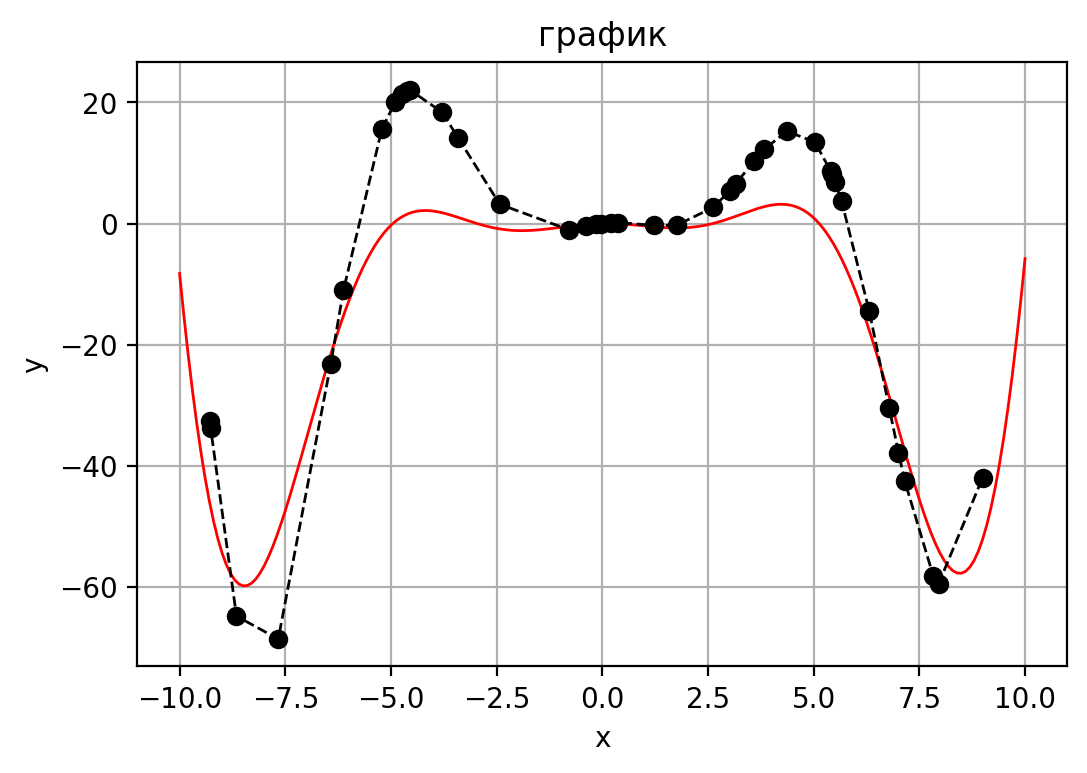

In [7]:
x_res=np.linspace(-10., 10., 200)
y_res=f(x_res,a, c, b,d)
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=200)
axes.plot(x_res, y_res, color="red", linewidth=1.0, linestyle="-", label="Численная")
axes.plot(data.x, data.y, '-o', color="black", linewidth=1.0, linestyle="--", label="Численная")
axes.set_title("график")
axes.grid()
axes.set_xlabel('x')
axes.set_ylabel('y')


plt.show()

### Вывод

Данная функция не является точной, следует провести более точной анализ ф-ии для уменьшения отклонения